In [1]:
# Imports 
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Loading data

In [2]:
# Getting the folder names 
folder_names = glob.glob("./temp_data/sep_1/data/*")

In [3]:
# Getting the data names
data_names = []
for i in folder_names:
    data_names.append(glob.glob(i+"/*.csv"))

## Data Cleaning

In [4]:
# Datasets to skip 
skip = []

# Labels of the datasets
labels = []

# Data list 
data = []


# Getting the labels and data for each dataset
for i in range(len(data_names)):
    if i in skip:
        continue
    
    for j in range(len(data_names[i])):
        labels.append([data_names[i][j][data_names[i][j].find(".csv")-1]])
        
        # Cleaning data
        df = pd.read_csv(data_names[i][j],skiprows = 1)
        df.drop(columns=df.columns[-1], axis=1,  inplace=True)
        
        data.append(df)

In [5]:
labels = [int(i)-1 for i in np.reshape(labels,(-1,))]

## Trajectory Plotting

In [6]:
# Grouped column names (x,y,z) grouping
grouped_columns_xyz = []

for i in range(len(data)):
    grouped_columns_xyz.append(np.array_split(data[i].columns, 63/3))

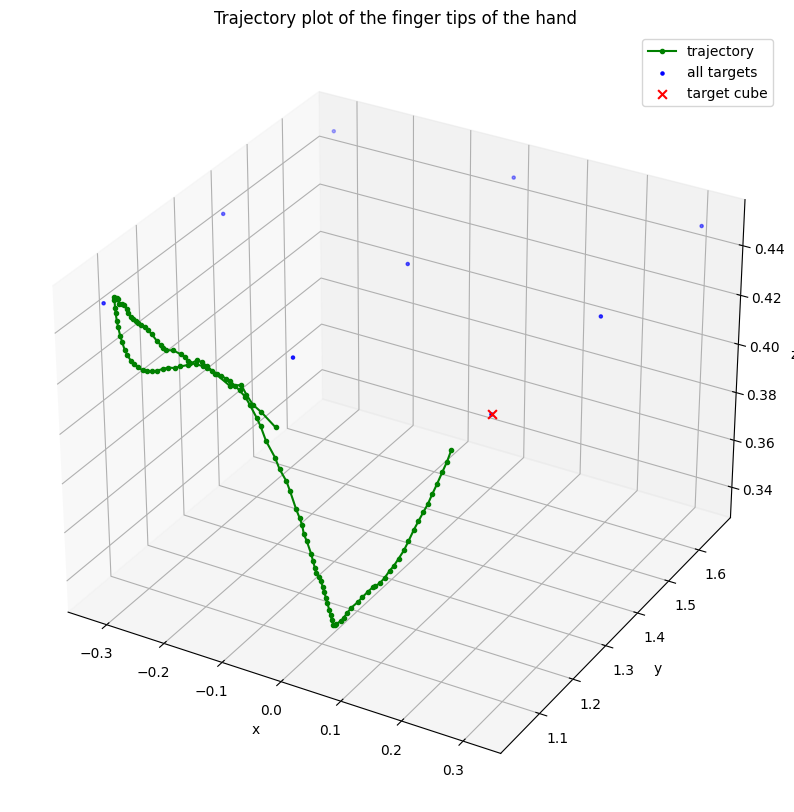

In [30]:
# x,y,z of target
target_points = np.array([[-0.314,1.661,0.45],[0,1.661,0.45],[0.314,1.661,0.45],[-0.314,1.347,0.45],[0,1.347,0.45],[0.314,1.347,0.45],[-0.314,1.033,0.45],[0,1.033,0.45],[0.314,1.033,0.45]])
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(projection='3d')

# Choosing a trajectory
idx = np.random.randint(len(data))
   
# Grouped columns
grouped_columns_x = data[idx].columns[::3] 
grouped_columns_y = data[idx].columns[1::3]
grouped_columns_z = data[idx].columns[2::3]

# Getting the centroid of the finger points
cent_x = np.mean(data[idx][grouped_columns_x],axis = 1)
cent_y = np.mean(data[idx][grouped_columns_y],axis = 1)
cent_z = np.mean(data[idx][grouped_columns_z],axis = 1)

ax.plot(cent_x, cent_y, cent_z, marker = "o", markersize = 3,color = 'g', label = "trajectory")
ax.scatter(target_points[:,0], target_points[:,1], target_points[:,2], marker = "o",s = 5, color = "b", label = "all targets")
ax.scatter(target_points[labels[idx]][0], target_points[labels[idx]][1], target_points[labels[idx]][2], marker = "x",s=40,color = "r", label = "target cube")

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z") 
ax.set_title("Trajectory plot of the finger tips of the hand")
ax.legend();

## Data Analysis

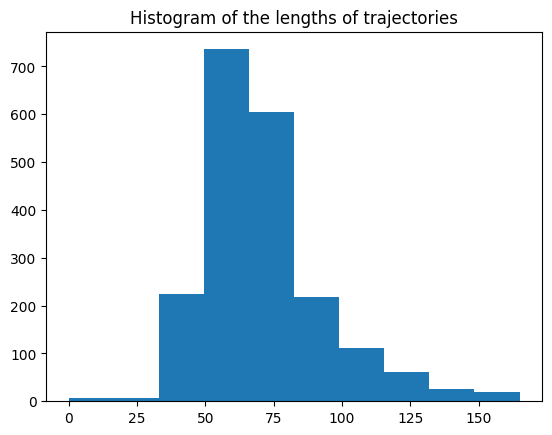

In [8]:
# Getting an estimate of the lengths of the sequences
lengths = [len(data[idx]) for idx in range(len(data))]
plt.hist(lengths)
plt.title("Histogram of the lengths of trajectories");